## Collaboration EDA

Exploratory data analysis focused on collaboration of authors on papers.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np

%matplotlib inline

In [2]:
%%time

# load metadata extracted data in notebook 00_load_metadata
# parse the author_parsed entries into a list of authors for each paper
arxiv_metadata = pd.read_csv('data/arxiv_metadata.zip', converters={"authors_parsed": lambda x:[entry.strip('[]') for entry in  x.split("], ")]})

<timed exec>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 15.2 s, sys: 1.92 s, total: 17.1 s
Wall time: 17.1 s


### Distribution of number of authors by paper

In [3]:
def count_authors_by_paper(df):
    return df['authors_parsed'].apply(lambda x: len(x))

In [4]:
author_counts = count_authors_by_paper(arxiv_metadata)
author_counts.describe()

count    2.486206e+06
mean     4.490322e+00
std      2.232710e+01
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      2.832000e+03
Name: authors_parsed, dtype: float64

In [5]:
author_counts.median()

3.0

### Distribution of number of authors by paper and subject
* add a column with author counts to each paper
* For every subject, make an array of author counts, note that a paper may have multiple subjects.
* Sort by median of author counts
* Plot as boxplots

In [6]:
arxiv_metadata['authors_count'] = author_counts

In [7]:
keys = ["Computer Science", "Economics", "Electrical Engineering and Systems Science", "Mathematics", "Physics", "Quantitative Biology", "Quantitative Finance", "Statistics", "Junk"]

In [8]:
author_counts_by_subject = {key: [] for key in keys}
for key in keys:
    idx = arxiv_metadata[key] == 1
    papers_by_subject = arxiv_metadata[idx]
    author_counts_by_subject[key] = papers_by_subject['authors_count']


In [9]:
df = pd.DataFrame(author_counts_by_subject, columns=author_counts_by_subject.keys())

In [10]:
med = df.median()
med = med.sort_values(ascending=True)
newdf = df[med.index]

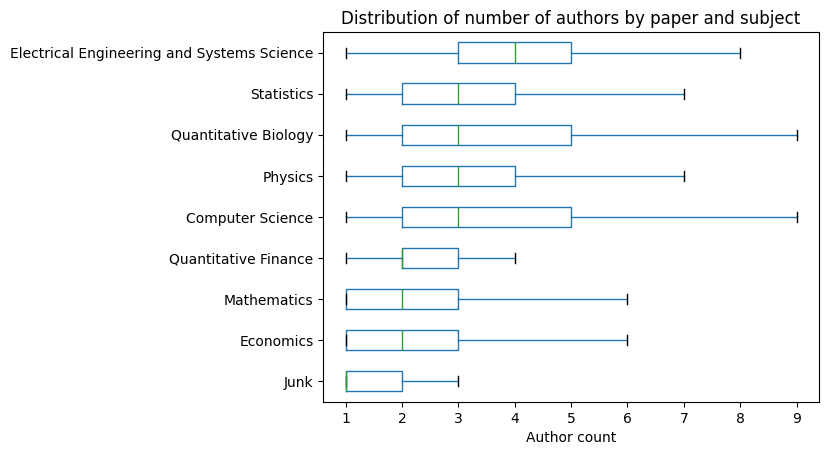

In [24]:
box_plot = newdf.boxplot(showfliers=False, vert=False)
box_plot.set_title('Distribution of number of authors by paper and subject')
box_plot.set_xlabel('Author count')
box_plot.grid(False)
plt.show()